In [1]:
#Useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
import statsmodels
import statsmodels.stats as stats

from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

Capston uploaded on GitHub : https://github.com/nainil5560/Uber_Dataset/tree/master

Dataset = My Uber Drives (2016)
This Dataset contains information about a customer ride in uber over three different countries. This dataset is to learn
from the behavior of an ordinary Uber customer.
This Data set conatains several fiels which describes the start date and end date of the trip, category of the trip, start location
and stop location of the trips, number of miles covered for the trip and the purpose of the trip.
We can answer many general question from this data set which can be used for gaining insight, like for example which day of the week or
month the person travels the most, for what purpose the person is travelling in uber.


In [2]:
car = pd.read_csv('https://raw.githubusercontent.com/nainil5560/Uber_Dataset/master/My%20Uber%20Drives%20-%202016.csv')
car.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:05,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,12/31/2016 23:15,12/31/2016 23:55,Business,Gampaha,Ilukwatta,NaN,Temporary Site


In [3]:
# Renaming the column name to get rid of * after the column name
car.rename(columns={'START_DATE*': 'START_DATE', 'END_DATE*': 'END_DATE',  'CATEGORY*': 'CATEGORY', 'START*' : 'START', 'STOP*': 'STOP', 'MILES*' : 'MILES', 'PURPOSE*' : 'PURPOSE'}, inplace=True)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE    1156 non-null object
END_DATE      1156 non-null object
CATEGORY      1156 non-null object
START         1156 non-null object
STOP          1156 non-null object
MILES         1155 non-null float64
PURPOSE       904 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
# Adding a column CITY_PAIR which shows the start and stop
car['CITY_PAIR'] = car['START']+'-'+ car['STOP']


In [6]:
# Adding a columns TOTAL_TIME to display total time for travel for each ride
test = [car]
for dataset in test: 
    dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE']).astype('datetime64[ns]')
    dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE']).astype('datetime64[ns]')
car['TOTAL_TIME'] = car['END_DATE'] - car['START_DATE']

In [7]:
car.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,CITY_PAIR,TOTAL_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce-Fort Pierce,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach,01:07:00


In [8]:
print('Number of missing values in each column')
print(car.isnull().sum())


Number of missing values in each column
START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           1
PURPOSE       252
CITY_PAIR       0
TOTAL_TIME      0
dtype: int64


In [9]:
# filling the missing value in miles column by taking average of the miles.
car.fillna(car.mean(), inplace=True)

In [10]:
car.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,CITY_PAIR,TOTAL_TIME
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.90000,Temporary Site,Kar?chi-Unknown Location,00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.20000,Meeting,Unknown Location-Unknown Location,00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.40000,Temporary Site,Katunayake-Gampaha,00:18:00
1154,2016-12-31 22:08:00,2016-12-31 23:05:00,Business,Gampaha,Ilukwatta,48.20000,Temporary Site,Gampaha-Ilukwatta,00:57:00
1155,2016-12-31 23:15:00,2016-12-31 23:55:00,Business,Gampaha,Ilukwatta,10.56684,Temporary Site,Gampaha-Ilukwatta,00:40:00


In [11]:
# Dropping off the null data
car.dropna().tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,CITY_PAIR,TOTAL_TIME
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.90000,Temporary Site,Kar?chi-Unknown Location,00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.20000,Meeting,Unknown Location-Unknown Location,00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.40000,Temporary Site,Katunayake-Gampaha,00:18:00
1154,2016-12-31 22:08:00,2016-12-31 23:05:00,Business,Gampaha,Ilukwatta,48.20000,Temporary Site,Gampaha-Ilukwatta,00:57:00
1155,2016-12-31 23:15:00,2016-12-31 23:55:00,Business,Gampaha,Ilukwatta,10.56684,Temporary Site,Gampaha-Ilukwatta,00:40:00


In [12]:
print(car.isnull().sum())

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       252
CITY_PAIR       0
TOTAL_TIME      0
dtype: int64


In [13]:
# filling the column name PURPOSE
car['PURPOSE'] = car['PURPOSE'].fillna('OTHER')

In [14]:
car.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,CITY_PAIR,TOTAL_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,OTHER,Fort Pierce-Fort Pierce,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach,01:07:00


In [15]:
car.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
CITY_PAIR     0
TOTAL_TIME    0
dtype: int64

In [16]:
# Names of categories
car.CATEGORY.unique()

array(['Business', 'Personal'], dtype=object)

In [17]:
# Number of trips segregated by categories
total_business_trip = car[car['CATEGORY'] == 'Business']
total_personal_trip = car[car['CATEGORY'] == 'Personal']
print('Business Trip :', len(total_business_trip.index))
print('Personal Trip :', len(total_personal_trip.index))

Business Trip : 1079
Personal Trip : 77


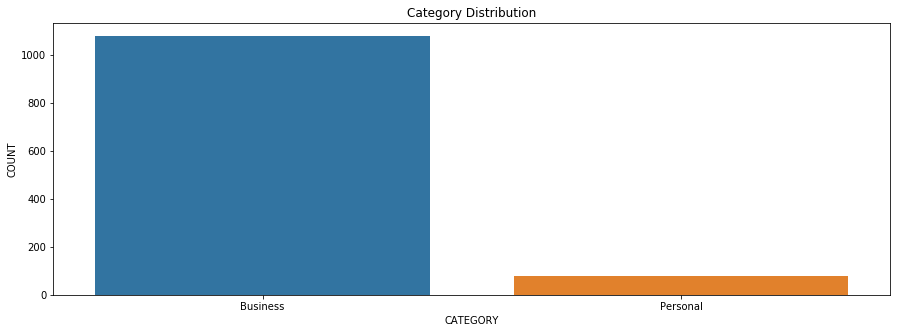

In [18]:
# Plotting number trips travelled by category
plt.figure(figsize=(15,5))
sns.countplot(car['CATEGORY'])
plt.xlabel('CATEGORY')
plt.ylabel('COUNT')
plt.title('Category Distribution')
plt.show()


Text(0.5,1,'MILES BY CATEGORY')

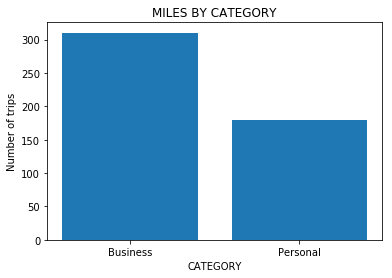

In [19]:
#Category by miles

plt.bar(car.CATEGORY, car.MILES, 0.8)
plt.xlabel('CATEGORY')
plt.ylabel('Number of trips')
plt.title('MILES BY CATEGORY')

In [20]:
# What are the purposes for travel
car.PURPOSE.unique()

array(['Meal/Entertain', 'OTHER', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

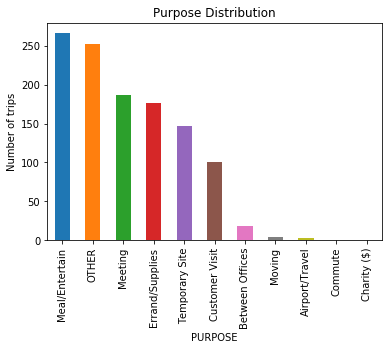

In [21]:
# What are the purpose for getting the ride 
car_plot = car['PURPOSE'].value_counts()
car_plot.plot(kind='bar')
plt.xlabel('PURPOSE')
plt.ylabel('Number of trips')
plt.title('Purpose Distribution')
plt.show()

In [22]:
# Total miles for each purpose
car.groupby('PURPOSE', as_index=False).sum()

,PURPOSE,MILES
0,Airport/Travel,16.50000
1,Between Offices,197.00000
2,Charity ($),15.10000
3,Commute,180.20000
4,Customer Visit,2089.50000
5,Errand/Supplies,1157.80000
6,Meal/Entertain,1814.20000
7,Meeting,2851.30000
8,Moving,18.20000
9,OTHER,2066.30000


In [23]:
# maximum drive started from the city
start_plot = car['START'].value_counts()
start_plot.head()

Cary                201
Unknown Location    147
Morrisville          85
Whitebridge          68
Islamabad            57
Name: START, dtype: int64

we can assumes that the person might be living in Cary as the maximum start point is from there

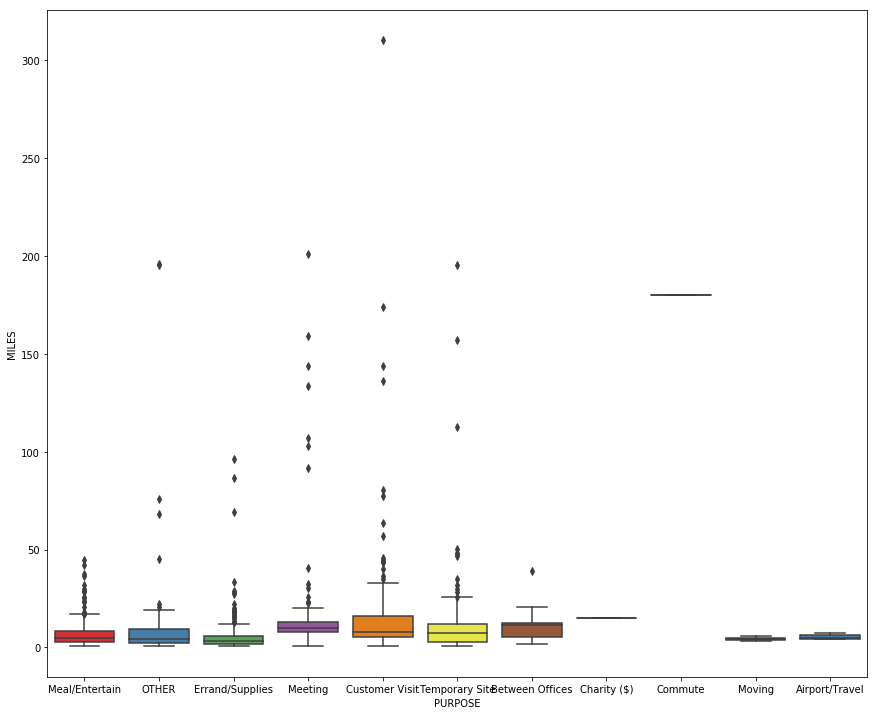

In [24]:
# Boxplot for plotting purpose and miles
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 12.27)
sns.boxplot(x="PURPOSE", y='MILES', data = car, palette="Set1", ax=ax)

The boxplot shows by purpose and miles driven. As we can see from the boxplot the outliers in this case there are several. The one that catches my attention is the customer visit with a total miles driven of 300 miles. This represet a trip picked up from city lahore to city karachi with aproximate travel time of 5 hours and 30 minutes. We can check the longest drive.

In [25]:
# Fetching the longest drive
car.loc[car['TOTAL_TIME'].idxmax()]['CITY_PAIR']

'lahore-Karachi'

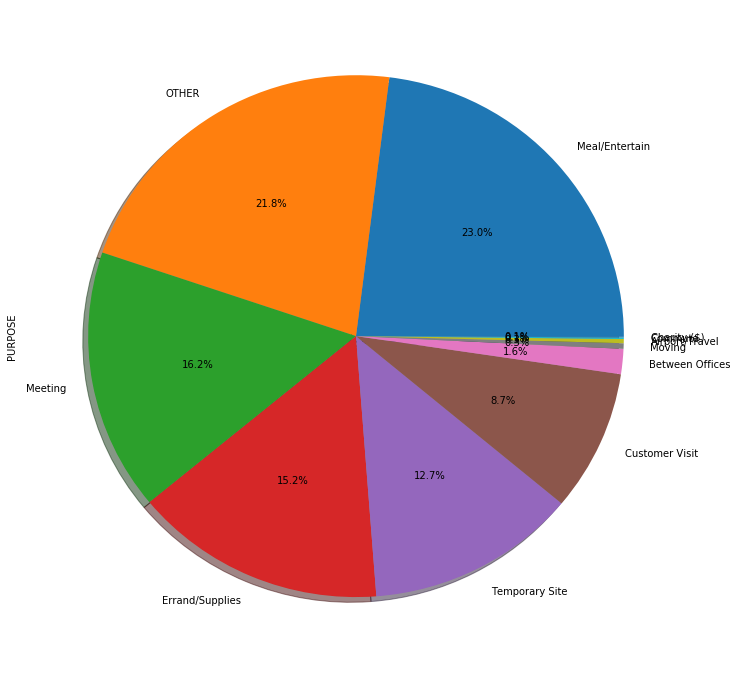

In [26]:
# Pie chart for displaying the distribution of area by puprose
plt.figure(figsize=(12,12))
car['PURPOSE'].value_counts()[:11].plot(kind='pie',autopct='%1.1f%%',shadow=True)#,explode=[0.2,0,0,0,0,0,0,0,0.2,0.2,0.1])
plt.show()

We can derive from the above pie-chart that the person maximum uses the uber drives for meal/entertainment purpose.

In [27]:
# Checking the datatype of Start date object
type(car['START_DATE'].iloc[0])

pandas._libs.tslib.Timestamp

In [28]:
# Now that the timestamp column are actually DateTime objects,we can use .apply() to create 3 new columns called Hour, Month, and Day of Week.
car['Hour'] = car['START_DATE'].apply(lambda time: time.hour)
car['Month'] = car['START_DATE'].apply(lambda time: time.month)
car['Day of Week'] = car['START_DATE'].apply(lambda time: time.dayofweek)

In [29]:
car.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,CITY_PAIR,TOTAL_TIME,Hour,Month,Day of Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce,00:06:00,21,1,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,OTHER,Fort Pierce-Fort Pierce,00:12:00,1,1,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce,00:13:00,20,1,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce,00:14:00,17,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach,01:07:00,14,1,2


In [30]:
# converting the day of week column in to string value indicating the name of the day
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [31]:
car['Day of Week'] = car['Day of Week'].map(dmap)

In [32]:
car.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,CITY_PAIR,TOTAL_TIME,Hour,Month,Day of Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce,00:06:00,21,1,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,OTHER,Fort Pierce-Fort Pierce,00:12:00,1,1,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce,00:13:00,20,1,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce,00:14:00,17,1,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach,01:07:00,14,1,Wed


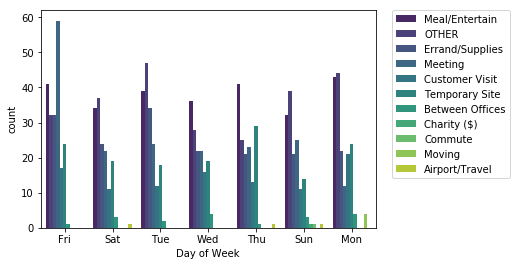

In [33]:
# plot displaying the purpose of trip according to the day of week.
sns.countplot(x='Day of Week',data=car,hue='PURPOSE',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The person is travelling maximum on friday for meeting purpose

In [34]:
# In which month did the person travelled the most
car["START_DATE"]=pd.to_datetime(car["START_DATE"],format="%m/%d/%Y")
per_month=car['START_DATE'].dt.month.value_counts()
per_month=per_month.sort_index()
per_month_mean = per_month.mean()
print("Month Distribute:\n",per_month)

Month Distribute:
 1      61
2     115
3     113
4      54
5      49
6     108
7     112
8     133
9      36
10    106
11    122
12    147
Name: START_DATE, dtype: int64


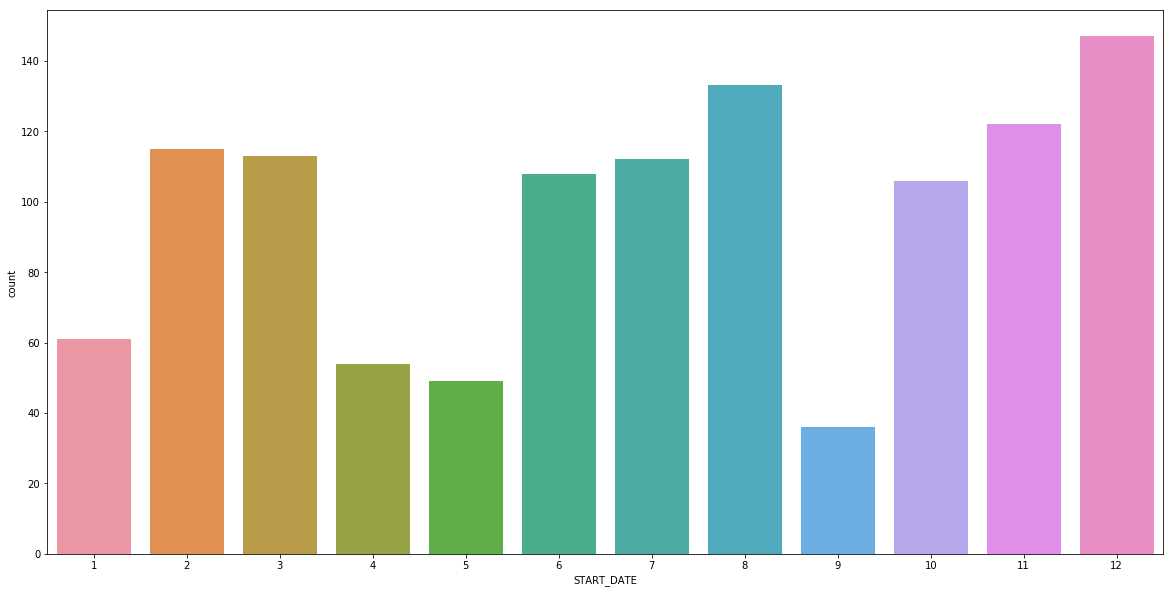

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(car['START_DATE'].dt.month)

The person travel the most during december and least during september.

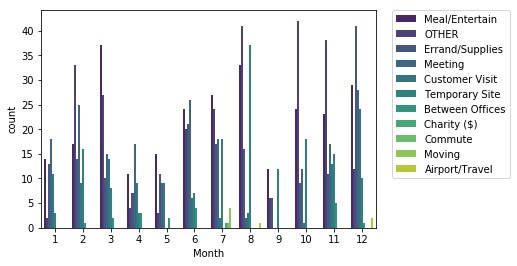

In [36]:
# Further finidng that what are the puprose that the person travles for each month
sns.countplot(x='Month',data=car,hue='PURPOSE',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

we can rectify the prupose of travel in uber for each month of the year. From thr plot we can see that in month of september
he is not using any of the uber drives for meeting purpose.

In [39]:
# Average miles travelled by the traveller for each purpose
purpose_mile = car.groupby('PURPOSE').sum()
purpose_mile

,MILES,Hour,Month
PURPOSE,,,
Airport/Travel,16.50000,38,32
Between Offices,197.00000,254,121
Charity ($),15.10000,11,7
Commute,180.20000,12,7
Customer Visit,2089.50000,1527,667
Errand/Supplies,1157.80000,2574,1284
Meal/Entertain,1814.20000,3993,1824
Meeting,2851.30000,2748,1167
Moving,18.20000,42,28


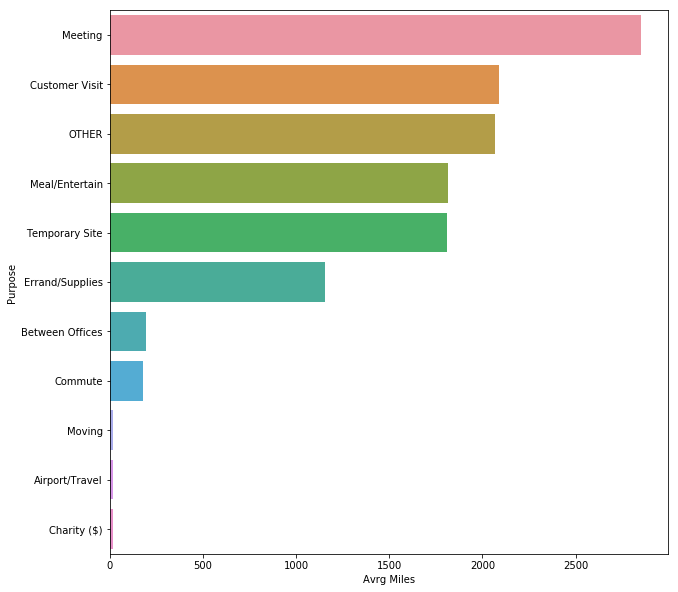

In [40]:
#plotting the bar graph to display average miles travelled for each purpose
plt.figure(figsize=(10,10))
purpose_mile['PURPOSE']=purpose_mile.index.tolist()
ax = sns.barplot(x='MILES',y='PURPOSE',data=purpose_mile,order=purpose_mile.sort_values('MILES',ascending=False)['PURPOSE'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()

The person is using maximum of the uber drives for meeting purpose and least for charity.

<h1> Descriptive analysis

In [41]:
car.describe(include='all')

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,CITY_PAIR,TOTAL_TIME,Hour,Month,Day of Week
count,1156,1156,1156,1156,1156,1156.000000,1156,1156,1156,1156.000000,1156.000000,1156
unique,1155,1155,2,178,188,NaN,11,364,NaN,NaN,NaN,7
top,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Cary,Cary,NaN,Meal/Entertain,Unknown Location-Unknown Location,NaN,NaN,NaN,Fri
freq,2,2,1079,201,203,NaN,266,85,NaN,NaN,NaN,206
first,2016-01-01 21:11:00,2016-01-01 21:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-12-31 23:15:00,2016-12-31 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,10.566840,NaN,NaN,0 days 00:23:13.079584,14.703287,6.987024,NaN
std,NaN,NaN,NaN,NaN,NaN,21.569762,NaN,NaN,0 days 00:27:13.679679,4.579762,3.546452,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,0 days 00:00:00,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN,NaN,0 days 00:10:00,12.000000,3.750000,NaN


From the above desriptive analysis we can drawe some conculsion
- There are total 1156 rides
- There are 2 different categories
- We can also see the time for the firt and the last trip
- From the mean we can see on an average the person travles 10.566 miles on his every trip.
- Minimum mile travelled by the person is 0.50 mile and max travelled by the person is 310.3 miles
- We can also see that max time it took to travel him is 5 hours 36 minutes.

<h1>Statistical Test

C:\Users\Nainil\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


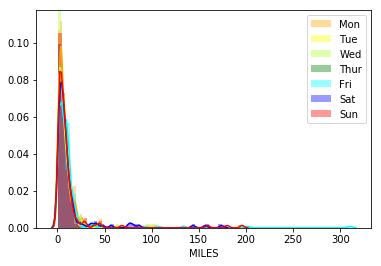

In [42]:
import statsmodels
import statsmodels.stats as stats

Mon_trips = car.loc[car['Day of Week']=='Mon', 'MILES']
Tue_trips = car.loc[car['Day of Week']=='Tue', 'MILES']
Wed_trips = car.loc[car['Day of Week']=='Wed', 'MILES']
Thur_trips = car.loc[car['Day of Week']=='Thur', 'MILES']
Fri_trips = car.loc[car['Day of Week']=='Fri', 'MILES']
Sat_trips = car.loc[car['Day of Week']=='Sat', 'MILES']
Sun_trips = car.loc[car['Day of Week']=='Sun', 'MILES']


sns.distplot(Mon_trips, color='orange')
sns.distplot(Tue_trips, color='yellow')
sns.distplot(Wed_trips, color='greenyellow')
sns.distplot(Thur_trips, color='green')
sns.distplot(Fri_trips, color='cyan')
sns.distplot(Sat_trips, color='blue')
sns.distplot(Sun_trips, color='red')

plt.legend(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

From the above seaborn distplot, we have seperated miles travelled by each day of week and then ploting the distribution of miles 
between the different days of week. From the distribution it seems like the mean or peak of the distribution is highest during 
wednesday then others.

In [43]:
# Performing statistical t-test to check the hypothesis
from statsmodels.stats import weightstats as weightstats
weightstats.ttest_ind(Wed_trips, Fri_trips, alternative='larger')

(-1.5498153754122677, 0.9389565087104597, 351.0)

We have performed a statistical t-test for testing the trips during wednesday and friday The hypothesis is that trips during wednesday is greater than trips during friday trips Null hypothesis is that trips during wednesday is less than or equal to friday trips. From the probability of the null hypothesis we can conclude that there is 93.89% chances that trips during wednesday is less than or equal to friday. test statistics = -1.549 degree of freedom = 351